In [2]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import matplotlib
import os
import random
from matplotlib.lines import Line2D
import colorsys
import platform
from pathlib import Path
from matplotlib import colors
import readFiles
import pandas as pd

# Matplotlib rc parameters modification
# plt.rcParams.update({
#   "figure.max_open_warning" : 0,
#   "text.usetex"             : True,
#   "text.latex.preamble"     : r"\usepackage{amsmath, bm, type1cm}",  # Added \bm for bold math
#   "figure.autolayout"       : True,
#   "font.family"             : "STIXGeneral",
#   "mathtext.fontset"        : "stix",
#   "font.size"               : 8,
#   "xtick.labelsize"         : 8,
#   "ytick.labelsize"         : 8,
#   "lines.linewidth"         : 1,
#   "lines.markersize"        : 5,
# })
# #plt.rcParams['text.latex.preamble']= r"\usepackage{amsmath}"
# matplotlib.rc('text', usetex=True)
# matplotlib.rcParams['text.latex.preamble'] = r'\boldmath'


plt.rcParams.update({
  'figure.max_open_warning': 0,
  'text.usetex':             True,
  'text.latex.preamble':     r"\usepackage{amsmath, bm, type1cm}",  # Added \bm for bold math
  'figure.autolayout':       True,
  'font.family':             "STIXGeneral",
  'mathtext.fontset':        "stix",
  'font.size':               8,
  'axes.titlesize':          8,
  'figure.labelsize':        7,
  'figure.titlesize':        8,
  # 'legend.fontsize':         6,
  # 'legend.handlelength':     1,
  # 'legend.handletextpad':    0.5,
  # 'legend.borderpad':        1.1,
  # 'legend.borderaxespad':    0.5,
  # 'legend.columnspacing':    1,
  # 'legend.labelspacing':     1.2,   # added
  'legend.frameon':          False,
  'legend.framealpha':       0.6,
  'legend.fancybox':         True,
  'axes.labelsize':          8,         # x and y label size
  'axes.grid':               False,
  'axes.grid.axis':          'both',
  'grid.alpha':              0.2,
  'grid.linewidth':          0.4,
  'xtick.labelsize':         6,
  'ytick.labelsize':         6,
  'lines.linewidth':         1,
  'lines.markersize':        3,
  'savefig.transparent':     True,
  'savefig.pad_inches':      0,
  'savefig.format':          'pdf',
  'savefig.bbox':            'tight'
})
plt.rcParams['text.latex.preamble']= r"\usepackage{amsmath}"
matplotlib.rcParams['text.latex.preamble'] = r'\boldmath'

colors = ['#4a91b5', '#e68139', '#5da258', '#87629b', '#1b9e77']

fig_width  = 7.05826  #inches
fig_height = 2.22 #inches for 1 row

if platform.system() == 'Darwin':  # macOS
    topDir = Path("/Volumes/rahul_2TB/high_bidispersity/new_data/")
    fig_save_path = Path("/Users/rahul/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/figures/paper_figs/")
elif platform.system() == 'Linux':
    topDir = Path("/media/rahul/rahul_2TB/high_bidispersity/new_data/")
    fig_save_path = Path("/home/rahul/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/figures/paper_figs/")
else:
    raise OSError("Unsupported OS")

alpha = 2.4207


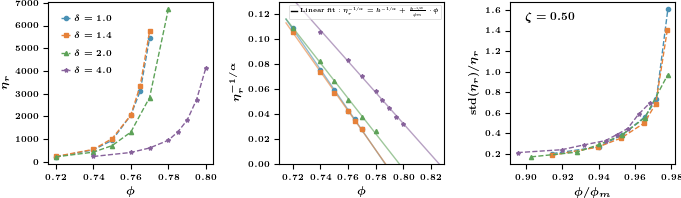

In [60]:
## FIg 2.

# Maron-Pierce All Plots

from scipy.optimize import curve_fit
from prettytable import PrettyTable
import warnings
from IPython.display import display, Math, HTML
warnings.filterwarnings("ignore", message="Mean of empty slice.", category=RuntimeWarning)
warnings.filterwarnings("ignore", message="invalid value encountered in scalar divide", category=RuntimeWarning)
from sklearn.metrics import r2_score

def linearfit(x, c, m):
    return m * x + c

# Color and marker settings
colors = ['#4a91b5', '#e68139', '#5da258', '#87629b', '#1b9e77']
line_markers = ['o', 's', '^', '*', 'p']
marker_size = [3, 3, 3, 3, 5]
#line_width = 2

# Parameters
npp  = 1000
phiv = [0.72, 0.74, 0.75, 0.76, 0.765, 0.77, 0.78, 0.785, 0.79, 0.795, 0.8, 0.802, 0.82]
arr  = [1.0, 1.4, 2.0, 4.0]
vrr  = '0.5'
numRuns = 2
off   = 100
c0s   = []
mvals = []
gamma = 20
# phims   = np.array([[0.78453329, 0.78486939, 0.7909178 , 0.82419867],
#                    [0.78453329, 0.78484748, 0.7927913 , 0.8228579 ],
#                    [0.78453329, 0.78464183, 0.78896423, 0.80393124]])
alpha = 2.4207 #2.4273

fig, ax = plt.subplots(1, 3, figsize=(fig_width, fig_height))

# Fig 1: Mean viscosity vs phi
for j, arj in enumerate(arr):
    visc = []
    for k, phi in enumerate(phiv):
        phir = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
        visc_list = []
        for run in range(numRuns):
            vrj = '0.25' if arj == 1 else vrr
            workDir = f"{topDir}/NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vrj}/run_{run+1}/"
            if os.path.exists(workDir):
                dataFile = glob.glob(workDir + "data_*.dat")[0]
                data     = np.loadtxt(dataFile)
                jammed   = any(x < 0 for x in data[:, 2])
                if len(data[:, 3]) > (gamma*100 - off) and not jammed:
                    visc_val = np.mean(data[off:, 3])
                    visc_list.append(visc_val)
        visc.append(np.mean(visc_list) if visc_list else np.nan)

    visc_filtered     = [x for x in visc if not np.isnan(x)]
    phi_vals_filtered = [y for x, y in zip(visc, phiv) if not np.isnan(x)]
    
    ax[0].plot(phi_vals_filtered, visc_filtered, linestyle='--',
               marker=line_markers[j], color=colors[j], #linewidth=line_width,
               markersize=marker_size[j], 
               label=fr'$\delta = {arj:.1f}$')

#ax[0].set_ylim(0, 6200)
ax[0].legend(loc="upper left")
ax[0].set_xlabel(r'$\phi$', fontstyle='italic')
ax[0].tick_params(axis='x')
#ax[0].legend(loc='upper left', fontsize=13, labelspacing=1.5, borderpad=1.2)
ax[0].set_ylabel(r'$\eta_{r}$', fontstyle='italic')
ax[0].tick_params(axis='y')

# Fig 2: linear fit
c0     = []
m_list = []
for j, arj in enumerate(arr):
    visc = []
    for k, phi in enumerate(phiv):
        phir      = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
        visc_list = []
        for run in range(numRuns):
            vrj     = '0.25' if arj == 1 else vrr
            workDir = f"{topDir}/NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vrj}/run_{run+1}/"
            if os.path.exists(workDir):
                dataFile = glob.glob(workDir + "data_*.dat")[0]
                data     = np.loadtxt(dataFile)
                jammed   = any(x < 0 for x in data[:, 2])
                if len(data[:, 3]) > (gamma*100 - off) and not jammed:
                    visc_val = np.mean(data[off:, 3])
                    visc_list.append(visc_val)
        visc.append(np.mean(visc_list) if visc_list else np.nan)
        
    visc_filtered     = [x ** (1 / -alpha) for x in visc if not np.isnan(x)]
    phi_vals_filtered = [y for x, y in zip(visc, phiv) if not np.isnan(x)]

    popt, pcov   = curve_fit(linearfit, phi_vals_filtered, visc_filtered)
    c_opt, m_opt = popt
    c0.append(c_opt)
    ax[1].plot(phi_vals_filtered, visc_filtered, linestyle='None',
               marker     = line_markers[j], color = colors[j], 
               #linewidth = line_width, 
               markersize = marker_size[j],
               zorder = 20)

    m_list.append(m_opt)
    xx = np.linspace(0.715, .85, 100)
    yy = linearfit(xx, c_opt, m_opt)
    ax[1].plot(xx, yy, color=colors[j], alpha = 0.6)

c0s.append(c0)
mvals.append(m_list)

ax[1].plot([], [], color="k", 
           label=r"$\mathrm{Linear\ fit:}\ \eta_r^{-1/\alpha} = k^{-1/\alpha} + \frac{k^{-1/\alpha}}{\phi_m} \cdot \phi$")

leg   = ax[1].legend(loc="upper right", fontsize=4.2,  borderpad=0.4, frameon=True)
frame = leg.get_frame()
frame.set_linewidth(0.7)  

leg.set_zorder(30)
ax[1].set_ylim(0, 0.13)
ax[1].set_xlim(0.71, 0.83)
ax[1].set_xlabel(r'$\phi$', fontstyle='italic')
ax[1].tick_params(axis='x')

ax[1].set_ylabel(r'$\eta_{r}^{-1/\alpha}$', fontstyle='italic')
ax[1].tick_params(axis='y')#, labelsize=14)

x_intercept = -np.array(c0s) / np.array(mvals)
phims       = list(x_intercept[0])

# Fig 3: Std deviation of viscosity vs phi
for j, arj in enumerate(arr):
    viscVar = []
    for k, phi in enumerate(phiv):
        phir = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
        visc_var_list = []
        for run in range(numRuns):
            vrj = '0.25' if arj == 1 else vrr
            workDir = f"{topDir}/NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vrj}/run_{run+1}/"
            if os.path.exists(workDir):
                dataFile = glob.glob(workDir + "data_*.dat")[0]
                data     = np.loadtxt(dataFile)
                jammed   = any(x < 0 for x in data[:, 2])
                if len(data[:, 3]) > (gamma*100 - off) and not jammed:
                    visc_var = np.std(data[off:, 3])/np.mean(data[off:, 3])
                    visc_var_list.append(visc_var)
        viscVar.append(np.mean(visc_var_list) if visc_var_list else np.nan)
    
    
    visc_var_filtered = [x for x in viscVar if not np.isnan(x)]
    phi_vals_filtered = [y/phims[j] for x, y in zip(viscVar, phiv) if not np.isnan(x)]
    #print(f'{visc_var_filtered[-1]}')
    ax[2].plot(phi_vals_filtered, visc_var_filtered, linestyle='--',
               marker     = line_markers[j], color = colors[j], 
               #linewidth = line_width,
               markersize = marker_size[j]
              )
    
ax[2].text(0.09, 0.93, fr'$\zeta = {float(vrr):.2f}$',
           #fontsize=18,
           ha='left', va='top',
           transform=ax[2].transAxes,
           bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', pad=2))
ax[2].set_xlabel(r'$\phi/\phi_m$', fontstyle='italic')
ax[2].tick_params(axis='x')#, labelsize=14)
ax[2].set_ylabel(r'$\mathrm{std}(\eta_r)/ \eta_{r}$', fontstyle='italic')
ax[2].tick_params(axis='y')
#ax[2].set_yscale('log')

if True:
    fig_save_path = '/home/rahul/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/figures/paper_figs' 
    #figFormat = ".pdf"
    plt.savefig(f'{fig_save_path}/Maron_Pierce_fit_vrr_{vrr}.pdf', dpi=500)

#fig.tight_layout()
print(f'alpha = {alpha}')
plt.show()

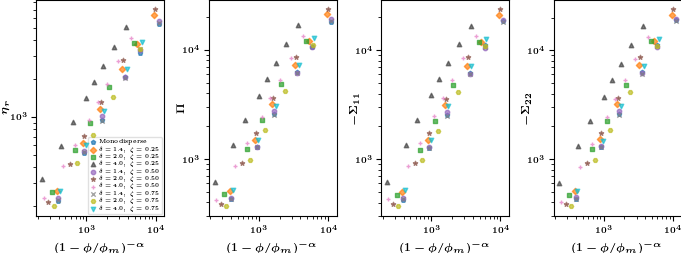

In [112]:
import numpy as np
import matplotlib.pyplot as plt
import os, glob

# Defining phi maxes
phims = np.array([[0.787, 0.788, 0.794 , 0.828],
                  [0.787, 0.787, 0.798 , 0.826],
                  [0.787, 0.787, 0.792, 0.807]])

# Parameters
npp          = 1000
phiv         = [0.72, 0.74, 0.75, 0.76, 0.765, 0.77, 0.78, 0.785, 0.79, 0.795, 0.8]
arr          = [1.4, 2.0, 4.0]   # 1.0 is a separate case
vrr          = ['0.25', '0.5', '0.75']
numRuns      = 2
off          = 100
pcount       = 0
totParams    = 4  # total plots
alpha        = 2.4273  # exponent

colors       = ['#1f77b4', '#ff7f0e', '#2ca02c', '#444444',
                '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
                '#bcbd22', '#17becf', '#f6a821', '#f6d020',
                '#003366', '#cc6699']

marker_shape = ['p', 'D', 's', '^', 'o', '*', '+', 'x', 'H', 'v', '<', '>', '|']

ylables      = [r'$\eta_r$', r'$\Pi$', 
                r'$ - \Sigma_{11} $', r'$ - \Sigma_{22} $']

param        = [[] for _ in range(totParams)]
paramserr    = [[] for _ in range(totParams)]


# Create 1x4 figure
#fig_height = fig_width/totParams * 1.5
#fig_height = 2
#fig, ax    = plt.subplots(1, totParams, figsize=(16, 4))
fig, ax = plt.subplots(1, totParams, figsize=(fig_width, fig_height*1.25))

ss = 10 # markersize

# Plotting ar = 1.0 and vr = 0.25 (Monodisperse case)
for k, phi in enumerate(phiv):
    phir           = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
    param_list     = [[] for _ in range(totParams)]
    paramserr_list = [[] for _ in range(totParams)]
    for run in range(numRuns):
        workDir   = f"{topDir}/NP_{npp}/phi_{phir}/ar_1.0/Vr_0.25/run_{run+1}/"
        if os.path.exists(workDir):
            dataFile = glob.glob(workDir+"data_*.dat")[0]
            data     = np.loadtxt(dataFile)
            visc     = data[off:, 3]
            pp       = data[off:, 8]/data[off:, 2]
            sigma_11 = -(data[off:, 10] + data[off:, 11])
            sigma_22 = -(data[off:, 11])
            datasets = [visc, pp, sigma_11, sigma_22]
            
            for ii, datset in enumerate(datasets):
                if len(datset) > off:
                    param_list[ii].append(np.mean(datset))
                    paramserr_list[ii].append(np.std(datset))
                
    for jj in range(totParams):
        param[jj].append(np.mean(param_list[jj]) if param_list[jj] else np.nan)
        paramserr[jj].append(np.mean(paramserr_list[jj]) if paramserr_list[jj] else np.nan)

for kk in range(totParams):
    param_filtered      = [x for x in param[kk] if not np.isnan(x)]
    paramerr_filtered   = [x for x in paramserr[kk] if not np.isnan(x)]
    phim_vals_filtered  = [(1 - (y / phims[0][0])) ** -alpha 
                           for x, y in zip(param[kk], phiv) if not np.isnan(x)]
    
    ax[kk].scatter(phim_vals_filtered, param_filtered, marker=marker_shape[pcount], 
                   s=ss, color=colors[pcount], alpha=0.7,  
                   label=r'$\textbf{Monodisperse}$')

pcount += 1
#ax[0].plot([], [], ' ', label=" ")

# Plotting other cases
for l, vrl in enumerate(vrr):
    for j, arj in enumerate(arr):
        param     = [[] for _ in range(totParams)]
        paramserr = [[] for _ in range(totParams)]
        for k, phi in enumerate(phiv):
            phir      = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
            param_list     = [[] for _ in range(totParams)]
            paramserr_list = [[] for _ in range(totParams)]
            for run in range(numRuns):
                workDir   = f"{topDir}/NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vrl}/run_{run+1}/"
                if os.path.exists(workDir+"F_rig.txt"):
                    dataFile = glob.glob(workDir+"data_*.dat")[0]
                    data     = np.loadtxt(dataFile)
                    visc     = data[off:, 3]
                    pp       = data[off:, 8]/data[off:, 2]
                    sigma_11 = -(data[off:, 10]+data[off:, 11])
                    sigma_22 = -(data[off:, 11])
                    datasets = [visc, pp, sigma_11, sigma_22]
                    
                    for ii, datset in enumerate(datasets):
                        if len(datset) > off:
                            param_list[ii].append(np.mean(datset))
                            paramserr_list[ii].append(np.std(datset))
                                                  
            for jj in range(totParams):
                param[jj].append(np.mean(param_list[jj]) if param_list[jj] else np.nan)
                paramserr[jj].append(np.mean(paramserr_list[jj]) if paramserr_list[jj] else np.nan)
        
        for kk in range(totParams):
            param_filtered      = [x for x in param[kk] if not np.isnan(x)]
            paramerr_filtered   = [x for x in paramserr[kk] if not np.isnan(x)]
            phim_vals_filtered  = [(1 - (y / phims[l][j+1])) ** -alpha 
                                   for x, y in zip(param[kk], phiv) if not np.isnan(x)]
            
            ax[kk].scatter(phim_vals_filtered, param_filtered, marker=marker_shape[pcount], 
                           s=ss, color=colors[pcount], alpha=0.7, zorder=20,
                           label = fr'$\delta = {arj:.1f},\; \zeta = {float(vrl):.2f}$')

        pcount += 1

    #if vrl != '0.75':
        #ax[0].plot([], [], ' ', label=" ") 

# Axis formatting
for ll in range(totParams):
    ax[ll].set_ylabel(ylables[ll], labelpad=-3)#, fontsize=9)
    
    ax[ll].set_xscale('log')
    ax[ll].set_yscale('log')
    ax[ll].set_xlabel(r'$(1 - \phi/\phi_m)^{-\alpha}$')#, fontsize=9)
    #ax[ll].tick_params(axis='x', labelsize=9)
    #ax[ll].tick_params(axis='y', labelsize=9)

ax[0].set_ylabel(ylables[0], labelpad=0)#, fontsize=9)
legend = ax[0].legend(loc='lower right', fontsize=3.8, frameon=True, labelspacing=0.5, borderpad=0.5)#, labelspacing=0.5)
#legend = ax[0].legend(loc='upper left', fontsize=3, frameon=True)
legend.set_zorder(-20)
for text in legend.get_texts():
    text.set_fontweight('bold')

fig.tight_layout()


# Save figure
if True:
    figFormat=".pdf"
    plt.savefig(f'{fig_save_path}/powerlaw_all_phim3{figFormat}', 
                bbox_inches="tight", dpi=800)

plt.show()

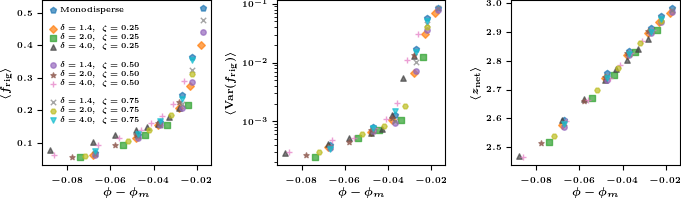

In [116]:
## Fig 4

phim = np.array([[0.787, 0.788, 0.794, 0.828],
                   [0.787, 0.787, 0.798, 0.826],
                   [0.787, 0.787, 0.792, 0.807]])

# Parameters
npp          = 1000
phiv         = [0.72, 0.74, 0.75, 0.76, 0.765, 0.77, 0.78, 0.785, 0.79, 0.795, 0.8]
arr          = [1.4, 2.0, 4.0] # 1.0 is a seperate case
vrr          = ['0.25', '0.5', '0.75']
numRuns      = 2
off          = 100
pcount       = 0
totParams    = 2 # total plots
ncols        = 2
nrows        = int(totParams/ ncols)
colors       = ['#1f77b4', '#ff7f0e', '#2ca02c', '#444444',
                '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
                '#bcbd22', '#17becf', '#f6a821', '#f6d020',
                '#003366', '#cc6699']
marker_shape = ['p', 'D', 's', '^', 'o', '*', '+', 'x', 'H', 'v', '<', '>', '|']
ylables      = [ r'$f_{rig}$', r'$\langle Z_{{net}} \rangle$']

phimall      = []
param        = []
paramserr    = []
zm           = []
#fig_height   = 2.3
#fig, ax= plt.subplots(1, 3, figsize=(11,3.5))
fig, ax= plt.subplots(1, 3, figsize=(fig_width, fig_height))

## plotting ar = 1 and vr = 0.25 case first
for k, phi in enumerate(phiv):
    phir           = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
    param_list     = []
    paramserr_list = []
    zlist =[]
    for run in range(numRuns):
        phim_vals = [(i -  phim[0][0]) for i in phiv]
        workDir   = f"{topDir}/NP_{npp}/phi_{phir}/ar_1.0/Vr_0.25/run_{run+1}/"
        
        if os.path.exists(workDir):
            frigFile = workDir + "F_rig.txt"
            frig     = np.loadtxt(frigFile)/ npp

            znetFile = workDir+"Z_Znet.txt"
            znet     = np.loadtxt(znetFile)[:, 2]
            
            param_list.append(np.mean(frig[off:]) if len(frig) > off else None)
            paramserr_list.append(np.var(frig[off:]) if len(frig) > off else None)
            zlist.append(np.mean(znet[off:]))
            
    param.append(np.mean(param_list) if param_list else np.nan)
    paramserr.append(np.mean(paramserr_list) if paramserr_list else np.nan)
    zm.append(np.nanmean(zlist) if zlist else np.nan)
    
param_filtered     = [x for x in param if not np.isnan(x)]
paramerr_filtered  = [x for x in paramserr if not np.isnan(x)]
phim_vals_filtered = [y for x, y in zip(param, phim_vals) if not np.isnan(x)]
z_filtered         = [x for x in zm if not np.isnan(x)]

ax[0].scatter(phim_vals_filtered, param_filtered, marker=marker_shape[pcount], 
              s=20, color=colors[pcount], alpha=0.7, label=r'$\textbf{Monodisperse}$')
ax[1].scatter(phim_vals_filtered, paramerr_filtered, marker=marker_shape[pcount], 
              s=20, color=colors[pcount], alpha=0.7, label=r'$\textbf{Monodisperse}$')
ax[2].scatter(phim_vals_filtered, z_filtered, marker=marker_shape[pcount], 
              s=20, color=colors[pcount], alpha=0.7, label=r'$\textbf{Monodisperse}$')  

pcount += 1
ax[0].plot([], [], ' ', label=" ") 
ax[1].plot([], [], ' ', label=" ")

# plotting other cases
for l, vrl in enumerate(vrr):
    for j, arj in enumerate(arr):
        param     = []
        paramserr = []
        zm        = []
        for k, phi in enumerate(phiv):
            phir           = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
            param_list     = []
            paramserr_list = []
            zlist = []
            for run in range(numRuns):
                phim_vals     = [(i - phim[l][j+1]) for i in phiv]
                workDir       = f"{topDir}/NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vrl}/run_{run+1}/"
                frigFile = workDir+"F_rig.txt"
                znetfile = workDir+"Z_Znet.txt"
                if os.path.exists(frigFile) and os.path.exists(znetfile):
                    frigFile = workDir+"F_rig.txt"
                    frig     = np.loadtxt(frigFile)/ npp

                    znetFile = workDir+"Z_Znet.txt"
                    znet     = np.loadtxt(znetFile)[:, 2]
                    
                    if len(frig) > off:
                        param_list.append(np.mean(frig[off:]))
                        paramserr_list.append(np.var(frig[off:]))
                        zlist.append(np.mean(znet[off:]))
                    else:
                        param_list.append(np.nan)
                        paramserr_list.append(np.nan)
                        zlist.append(np.nan)
                        
            # Average over runs for this phi
            param.append(np.nanmean(param_list) if param_list else np.nan)
            paramserr.append(np.nanmean(paramserr_list) if paramserr_list else np.nan)
            zm.append(np.nanmean(zlist) if zlist else np.nan)
            
        # Clean up for plotting
        param_filtered     = [x for x in param if not np.isnan(x)]
        paramerr_filtered  = [x for x in paramserr if not np.isnan(x)]
        phim_vals_filtered = [y for x, y in zip(param, phim_vals) if not np.isnan(x)]
        z_filtered         = [x for x in zm if not np.isnan(x)]
        
        ss = 15 # marker size
        ax[0].scatter(phim_vals_filtered, param_filtered, marker=marker_shape[pcount], 
                    s=ss, color=colors[pcount], alpha=0.7,  
                    label = fr'$\delta = {arj:.1f},\; \zeta = {float(vrl):.2f}$')
        ax[1].scatter(phim_vals_filtered, paramerr_filtered, marker=marker_shape[pcount], 
                    s=ss, color=colors[pcount], alpha=0.7,  
                    label = fr'$\delta = {arj:.1f},\; \zeta = {float(vrl):.2f}$')
        ax[2].scatter(phim_vals_filtered, z_filtered, marker=marker_shape[pcount], 
                      s=ss, color=colors[pcount], alpha=0.7,  
                      label = fr'$\delta = {arj:.1f},\; \zeta = {float(vrl):.2f}$')    
        
        pcount += 1

    ax[0].plot([], [], ' ', label=" ") 
    ax[1].plot([], [], ' ', label=" ") 

# labelfont = 8
# tickfont  = 7.5  

for ax_i in ax:
    ax_i.tick_params(axis='both')#, labelsize=tickfont)

    ax_i.set_xlabel(r'$\phi - \phi_m$')#, fontsize=labelfont, labelpad=5)
    
ax[0].set_ylabel(r'$\langle f_{\mathrm{rig}} \rangle$')#, fontsize=labelfont)
ax[1].set_ylabel(r'$\langle \mathrm{Var}(f_{\mathrm{rig}}) \rangle$')#, fontsize=labelfont)
ax[1].set_yscale('log')

ax[2].set_ylabel(r'$\langle z_{\mathrm{net}} \rangle$')#, fontsize=labelfont+2)
#ax[0].legend(loc='upper left', fontsize=4, frameon=False)#, labelspacing=0.5)
ax[0].legend(loc='upper left', fontsize=5.1, frameon=False, labelspacing=0.4, borderpad=0.5)

fig.tight_layout()

if True:
    figFormat=".pdf"
    plt.savefig(f'{fig_save_path}/frig_znet_plot{figFormat}', bbox_inches="tight",pad_inches=0, dpi=800)

plt.show()

In [117]:
def updateContAngle(theta, contList):
    '''
    This function to calulated the complementary contact angle and append to 
    relevant list (contList)

    Inputs:
    theta    - primary contact angle. Calculated by arctan2(nz,nx)
    contList - list where the angle appends. This list contains all the contact angle for one case, all runs
    '''
    contList.append(theta)
    if theta < 0:
        contList.append(np.pi - abs(theta))
    else:
        contList.append(theta - np.pi)

def particleSizeList(randomSeedFile, sizeRatio, npp = 1000):
    '''
    This function reads the random seed file and creates
    a list of particle sizes. The list index is the particle index.

    Inputs:
    randomSeedFile - location for the random seed file. It contains the particle index and sizes
    sizeRatio      - delta or ar for the case
    npp            - system size
    '''

    if sizeRatio == 1:
        # Painting particles randomly in two colours for monodisperse case.
        particleSize = [1]*(int(npp/2)) + [2]*(int(npp/2))
        random.shuffle(particleSize)
    else:
        particleSize = np.loadtxt(randomSeedFile, usecols = 3) # reading only column 3 which has particle size
        randomSeedFile.close()
    return particleSize

mean for SS, zeta: 0.25 = 14897.1667, total contacts = 1072596
mean for SL, zeta: 0.25 = 61036.9167, total contacts = 4394658
mean for LL, zeta: 0.25 = 59125.3889, total contacts = 4257028
mean for SS, zeta: 0.50 = 48706.2222, total contacts = 3506848
mean for SL, zeta: 0.50 = 65962.9722, total contacts = 4749334
mean for LL, zeta: 0.50 = 20538.6389, total contacts = 1478782
mean for SS, zeta: 0.75 = 46817.8333, total contacts = 3370884
mean for SL, zeta: 0.75 = 20692.7778, total contacts = 1489880
mean for LL, zeta: 0.75 = 2036.1944, total contacts = 146606


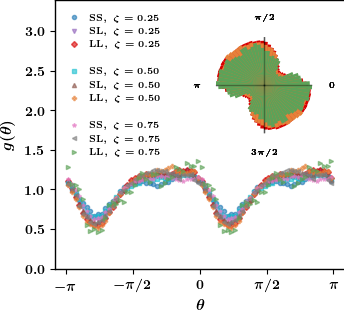

In [129]:
# import os
# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib.lines import Line2D
# import matplotlib.lines as mlines

# your existing helper functions: particleSizeList, interactionsList, updateContAngle, etc.

# Plot settings
ranSeedFile = "random_seed.dat"
intFile     = "int_random_seed_params_stress100r_shear.dat"
contFile    = 'contacts.txt'

# Use unique colors and markers for each (vr, sizePair) combination
colors_markers = [
    ('#1f77b4', 'o'),   # SS, 0.25 – blue circle
    ('#9467bd', 'v'),   # SL, 0.25 – purple triangle down
    ('#D80000', 'D'),   # LL, 0.25 – red diamond

    ('#17becf', 's'),   # SS, 0.5  – cyan square
    ('#8c564b', '^'),   # SL, 0.5  – brown triangle up
    ('#e68139', 'P'),   # LL, 0.5  – orange plus-filled

    ('#e377c2', '*'),   # SS, 0.75 – pink star
    ('#7f7f7f', '<'),   # SL, 0.75 – gray triangle left
    ('#5da258', '>')    # LL, 0.75 – green triangle right
]

ar       = '1.4'
phival   = { ('0.25', '1.4'): '0.76', ('0.5', '1.4'): '0.76', ('0.75', '1.4'): '0.77',
             ('0.25', '4.0'): '0.80', ('0.5', '4.0'): '0.80', ('0.75', '4.0'): '0.78' }
vr       = ['0.25', '0.5', '0.75']
numRuns  = 2
npp      = 1000
off      = 100

sizePair = ['SS', 'SL', 'LL']  # Exclude 'Total'
fig, ax  = plt.subplots(figsize=(fig_width/2, fig_width/2.2), constrained_layout=True)

plot_id  = 0  # For mapping to colors/markers
legend_handles = [] 

for j, vrj in enumerate(vr):
    phii                = phival[(vrj, ar)]
    contactAngleAllRuns = [[] for _ in range(len(sizePair))]

    dataname = f'{topDir}/NP_{npp}/phi_{phii}/ar_{ar}/Vr_{vrj}'
    if os.path.exists(dataname):
        for l in range(numRuns):
            with open(f'{dataname}/run_{l+1}/{ranSeedFile}', 'r') as ranFile:
                particleSize = particleSizeList(ranFile, sizeRatio=float(ar), npp=npp)

            with open(f'{dataname}/run_{l+1}/{intFile}', 'r') as interFile:
                contactList  = readFiles.interactionsList(interFile)

            contactAngleTotal = [[] for _ in range(len(sizePair))]
            for sampleList in contactList[off:]:
                timeStepContactAngle = [[] for _ in range(len(sizePair))]
                for i in range(sampleList.shape[0]):
                    ps1 = particleSize[int(sampleList[i, 0])]
                    ps2 = particleSize[int(sampleList[i, 1])]
                    contState = int(sampleList[i, 10])
                    thetaRad  = np.arctan2(sampleList[i, 4], sampleList[i, 2])

                    if contState == 2:
                        if ps1 == ps2 == 1:
                            updateContAngle(thetaRad, timeStepContactAngle[0])  # SS
                        elif ps1 != ps2:
                            updateContAngle(thetaRad, timeStepContactAngle[1])  # SL
                        elif ps1 == ps2 > 1:
                            updateContAngle(thetaRad, timeStepContactAngle[2])  # LL

                for m in range(len(sizePair)):
                    contactAngleTotal[m].append(timeStepContactAngle[m])

            for n in range(len(sizePair)):
                flattened = [i for sub in contactAngleTotal[n] for i in sub]
                contactAngleAllRuns[n].append(flattened)

    for im in range(len(sizePair)):
        allAngles         = [i for sub in contactAngleAllRuns[im] for i in sub]
        counts, bin_edges = np.histogram(allAngles, bins=72, density=False)
        bin_centers       = (bin_edges[:-1] + bin_edges[1:]) / 2
        countsAvg         = np.mean(counts)
        print(f'mean for {sizePair[im]}, zeta: {float(vrj):.2f} = {countsAvg:.4f}, total contacts = {np.sum(counts)}')
        color, marker = colors_markers[plot_id]
        #linestyle1, alpha1, markersize1 = ('--', 1, 4.5) if sizePair[im] == 'LL' else (None, 0.2, 4)
        
        ax.plot(bin_centers, counts / countsAvg,
                linestyle='None', marker = marker, #markersize = 4,
                color = color, alpha = 0.6,
                label = fr'$\textbf{{{sizePair[im]}}},\ \zeta = {float(vrj):.2f}$')
        
        # Inset only for LL
        if sizePair[im] == 'LL':
            ax_inset = fig.add_axes([0.61, 0.57, 0.30, 0.30], projection='polar')
            width    = 2 * np.pi / len(bin_centers)
            ax_inset.bar(bin_centers, counts / countsAvg * 0.8, width=width, color=color, alpha=1)
            ax_inset.set_ylim(0, np.max(counts / countsAvg) * 1.1)
            ax_inset.set_theta_zero_location("E")
            ax_inset.set_theta_direction(1)  # ⬅ ANTICLOCKWISE
            ax_inset.grid(False)
            ax_inset.set_frame_on(False)
            ax_inset.set_xticks([0, np.pi/2, np.pi, 3*np.pi/2])
            ax_inset.set_xticklabels([r"$0$", r"$\pi/2$", r"$\pi$", r"$3\pi/2$"])#, fontsize=8)
            ax_inset.set_yticklabels([])
            ax_inset.set_yticks([])
            
            for angle in [0, np.pi/2, np.pi, 3*np.pi/2]:
                ax_inset.plot([angle, angle], [0, np.max(counts / countsAvg) * 1.2], color='black', alpha=0.3)
            ax_inset.set_rmax(np.max(counts / countsAvg) * 0.8)

        plot_id += 1
        
    ax.plot([], [], ' ', label=" ") 

# Final plot formatting
ax.set_xticks([-np.pi, -np.pi / 2, 0, np.pi / 2, np.pi])
ax.set_xticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$'], fontsize=10)
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel(r'$\theta$', fontsize=11)
ax.set_ylabel(r'$g(\theta)$', fontsize=11, labelpad=7)
ax.set_ylim(-0.01, 3.4)

for spine in ['top', 'right', 'left', 'bottom']:
    ax.spines[spine].set_linewidth(1)

ax.legend(fontsize=6.5, frameon=False, loc='upper left', handletextpad=1.2, labelspacing=0.6)

plt.savefig(f'{fig_save_path}/cont_pair_dist_{ar}.pdf', bbox_inches="tight", dpi=500)
plt.show()

In [119]:
fig_width

7.05826

mean for SS, zeta: 0.25 = 36580.7778, total contacts = 2633816
mean for SL, zeta: 0.25 = 53876.7500, total contacts = 3879126
mean for LL, zeta: 0.25 = 8982.3333, total contacts = 646728
mean for SS, zeta: 0.50 = 87088.8056, total contacts = 6270394
mean for SL, zeta: 0.50 = 33893.8056, total contacts = 2440354
mean for LL, zeta: 0.50 = 1181.6389, total contacts = 85078
mean for SS, zeta: 0.75 = 119846.3611, total contacts = 8628938
mean for SL, zeta: 0.75 = 13710.3333, total contacts = 987144
mean for LL, zeta: 0.75 = 163.5278, total contacts = 11774


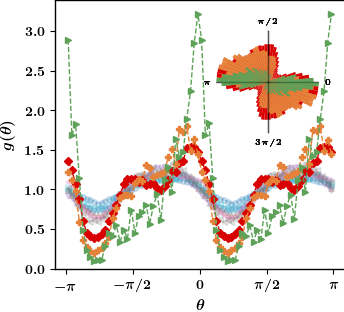

In [282]:
# import os
# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib import rcParams

ranSeedFile = "random_seed.dat"
intFile     = "int_random_seed_params_stress100r_shear.dat"
contFile    = 'contacts.txt'

# Updated colors and markers for 9 combinations (SS, SL, LL for Vr = 0.25, 0.5, 0.75)
colors_markers = [
    ('#1f77b4', 'o'),   # SS, 0.25 – blue circle
    ('#9467bd', 'v'),   # SL, 0.25 – purple triangle down
    ('#D80000', 'D'),   # LL, 0.25 – red diamond

    ('#17becf', 's'),   # SS, 0.5 – cyan square
    ('#8c564b', '^'),   # SL, 0.5 – brown triangle up
    ('#e68139', 'P'),   # LL, 0.5 – orange plus-filled

    ('#e377c2', '*'),   # SS, 0.75 – pink star
    ('#7f7f7f', '<'),   # SL, 0.75 – gray triangle left
    ('#5da258', '>')    # LL, 0.75 – green triangle right
]

# Parameters
ar       = '4.0'
phival   = {('0.25', '1.4'): '0.76', ('0.5', '1.4'): '0.76', ('0.75', '1.4'): '0.77',
            ('0.25', '4.0'): '0.80', ('0.5', '4.0'): '0.80', ('0.75', '4.0'): '0.78' }
vr       = ['0.25', '0.5', '0.75']
numRuns  = 2
npp      = 1000
off      = 100

fig, ax  = plt.subplots(figsize=(fig_width/2, fig_width/2.2), constrained_layout=True)

for j, vrj in enumerate(vr):
    phii = phival[(vrj, ar)]
    sizePair = ['SS', 'SL', 'LL']
    contactAngleAllRuns = [[] for _ in range(len(sizePair))]

    dataname = f'{topDir}/NP_{npp}/phi_{phii}/ar_{ar}/Vr_{vrj}'
    if os.path.exists(dataname):
        for l in range(numRuns):
            with open(f'{dataname}/run_{l+1}/{ranSeedFile}', 'r') as ranFile:
                particleSize = particleSizeList(ranFile, sizeRatio=float(ar), npp=npp)

            with open(f'{dataname}/run_{l+1}/{intFile}', 'r') as interFile:
                contactList = readFiles.interactionsList(interFile)

            contactAngleTotal = [[] for _ in range(len(sizePair))]
            for sampleList in contactList[off:]:
                timeStepContactAngle = [[] for _ in range(len(sizePair))]
                for i in range(sampleList.shape[0]):
                    particleSize1 = particleSize[int(sampleList[i, 0])]
                    particleSize2 = particleSize[int(sampleList[i, 1])]
                    contState = int(sampleList[i, 10])
                    thetaRad = np.arctan2(sampleList[i, 4], sampleList[i, 2])

                    if contState == 2:
                        if (particleSize1   == particleSize2 == 1):
                            updateContAngle(thetaRad, timeStepContactAngle[0])
                        elif (particleSize1 != particleSize2):
                            updateContAngle(thetaRad, timeStepContactAngle[1])
                        elif (particleSize1 == particleSize2 > 1):
                            updateContAngle(thetaRad, timeStepContactAngle[2])

                for m in range(len(contactAngleTotal)):
                    contactAngleTotal[m].append(timeStepContactAngle[m])

            for n in range(len(contactAngleAllRuns)):
                contactAngleList = [i for sub in contactAngleTotal[n] for i in sub]
                contactAngleAllRuns[n].append(contactAngleList)
    
    zorder_mapping = {'#D80000': 1, '#e68139': 2, '#5da258': 3}

    for i in range(len(contactAngleAllRuns)):
        allContactAngles  = [i for sub in contactAngleAllRuns[i] for i in sub]
        counts, bin_edges = np.histogram(allContactAngles, bins=72, density=False)
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
        countsAvg   = np.mean(counts)
        print(f'mean for {sizePair[i]}, zeta: {float(vrj):.2f} = {countsAvg:.4f}, total contacts = {np.sum(counts)}')

        index = j * 3 + i
        plot_color, marker = colors_markers[index]
        
        linestyle1, alpha1, markersize1 = ('--', 1, 4.5) if sizePair[i] == 'LL' else (None, 0.2, 4)
        zorder_value = zorder_mapping.get(plot_color, 0)
        
        ax.plot(bin_centers, counts / countsAvg, linestyle = linestyle1, 
                marker = marker, markersize = markersize1, alpha = alpha1,
                label  = fr'{sizePair[i]}, Vr = {vrj}', color = plot_color,
                zorder = zorder_value)

        if i == 2:  # Only for LL, plot inset
            #print('plot')
            ax_inset = fig.add_axes([0.61, 0.57, 0.32, 0.32], projection='polar')
            width    = 2 * np.pi / len(bin_centers)
            bars     = ax_inset.bar(bin_centers, counts / countsAvg * 0.8, width=width, color=plot_color, alpha=1)
            ax_inset.set_ylim(0, np.max(counts / countsAvg) * 1.1)
            ax_inset.set_theta_zero_location("E")
            ax_inset.set_theta_direction(1)  # counter-clockwise
            ax_inset.grid(False)
            ax_inset.set_frame_on(False)
            ax_inset.set_xticks([0, np.pi/2, np.pi, 3*np.pi/2])
            ax_inset.set_xticklabels([r"$0$", r"$\pi/2$", r"$\pi$", r"$3\pi/2$"], weight='normal')#, fontsize=8)
            ax_inset.tick_params(axis = 'x', pad = -4)
            ax_inset.set_yticklabels([])
            ax_inset.set_yticks([])
            for angle in [0, np.pi/2, np.pi, 3*np.pi/2]:
                ax_inset.plot([angle, angle], [0, np.max(counts / countsAvg) * 1.2], color='black', alpha=0.3)
            ax_inset.set_rmax(np.max(counts / countsAvg) * 0.8)

xticks       = [-np.pi, -np.pi / 2, 0, np.pi / 2, np.pi]
xtick_labels = [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$']
ax.set_xticks(xticks)
#ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.set_xticklabels(xtick_labels, fontsize=10)
ax.set_xlabel(r'$\theta$', fontsize=11)
ax.set_ylabel(r'$g(\theta)$', labelpad=7, fontsize=11)
ax.set_ylim(-0.01, 3.4)

for spine in ['top', 'right', 'left', 'bottom']:
    ax.spines[spine].set_linewidth(1)

#ax.legend(fontsize=7, loc='upper right', frameon=False, ncol=1)
plt.savefig(f'{fig_save_path}/cont_pair_dist_{ar}.pdf', bbox_inches="tight", dpi=500, transparent=False)
plt.show()

/tmp/ipykernel_1259746/3775197937.py:193: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig(f'{fig_save_path}/PDF_sl_ar_4_3{figFormat}', bbox_inches="tight",dpi=800)
/tmp/ipykernel_1259746/3775197937.py:193: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig(f'{fig_save_path}/PDF_sl_ar_4_3{figFormat}', bbox_inches="tight",dpi=800)
/home/rahul/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


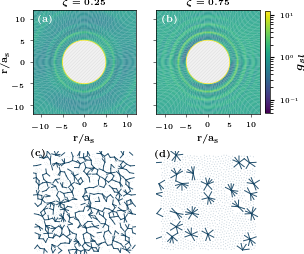

In [157]:
import os
import glob
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.patches import Wedge
from matplotlib.patches import Circle
import matplotlib as mpl

import readFiles  # Custom module

# Parameters
npp        = 1000
numRun     = 1
vrr        = ['0.25', '0.75']
phi        = [0.795, 0.785]
ar         = 4.0
sizePair   = 'sl'
label_list = [r'$\mathbf{(a)}$', r'$\mathbf{(b)}$',
              r'$\mathbf{(c)}$', r'$\mathbf{(d)}$']

particleFile    = 'par_*.dat'
interactionFile = 'int_*.dat'

# === Create 2x2 subplots ===
#fig, axs = plt.subplots(2, 2, figsize=(fig_width/2, fig_width/2.15), constrained_layout=False)
# # fig.subplots_adjust(hspace=0.5)
fig, axs = plt.subplots(2, 2, figsize=(fig_width/2, fig_width/2.15), gridspec_kw={'hspace': 0.25})

# --- TOP TWO COLUMNS: wedge plots (axs[0, 0] and axs[0, 1])
for idx, vri in enumerate(vrr):
    ax = axs[0, idx]
    phii     = phi[idx]
    phir     = '{:.3f}'.format(phii) if len(str(phii).split('.')[1]) > 2 else '{:.2f}'.format(phii)
    dataname = f'{topDir}/NP_{npp}/phi_{phir}/ar_{ar:.1f}/Vr_{vri}/run_{numRun}'

    if os.path.exists(dataname): 
        datFile   = glob.glob(f'{dataname}/PDF_{sizePair}_*.txt')[0]
        rbin      = np.genfromtxt(datFile, skip_header=1, max_rows=1)
        thetabin  = np.genfromtxt(datFile, skip_header=2, max_rows=1)
        g_r_theta = np.genfromtxt(datFile, skip_header=5)

        ds     = 1
        plim   = 12
        tdist  = ds * plim
        r1     = np.abs(rbin - ds*2).argmin()
        rlim   = np.abs(rbin - tdist * np.sqrt(2) * 1.1).argmin()

        g_r_submat = g_r_theta[r1:rlim, :]
        norm = LogNorm(vmin=5e-2, vmax=np.max(g_r_submat))
        cmap = plt.cm.viridis

        for ii in range(r1, rlim):
            r_start = rbin[ii]
            r_end   = rbin[ii + 1]
            for jj in range(len(thetabin) - 1):
                theta_start = np.degrees(thetabin[jj])
                theta_end   = np.degrees(thetabin[jj + 1])
                wedge       = Wedge((0, 0), r_end, theta_start, theta_end,
                                    width       = r_end - r_start,
                                    facecolor   = cmap(norm(g_r_theta[ii, jj])),
                                    edgecolor   = 'none',
                                    transform   = ax.transData._b,
                                    antialiased = True,
                                    rasterized  = True,
                                    zorder = 20)
                ax.add_patch(wedge)
                
    mpl.rcParams['hatch.linewidth'] = 0.2
    center_circle = Circle((0, 0), rbin[r1]*4,
                           facecolor="lightgrey",
                           hatch="//////////",             # style: '/', '\\', '|', '-', '+', 'x', 'o', 'O', '.', '*'
                           edgecolor="grey", alpha=0.3)
    
    for spine in ax.spines.values():
        spine.set_zorder(25)
        spine.set_linewidth(0.5) 
    
    ax.add_patch(center_circle)
    ax.set_aspect('equal')
    ax.set_xlim([-tdist, tdist])
    ax.set_ylim([-tdist, tdist])
    #ax.tick_params(axis='both', which='both', labelsize=8)
    ax.tick_params(axis='x', labelsize=4.8, length=2, width=0.4, direction='out')
    ax.tick_params(axis='y', labelsize=4.8, length=2, width=0.4, direction='out')
    if idx == 1:
        ax.set_yticklabels([])

    ax.grid(False)
    ax.set_title(fr'$\zeta = {float(vri):.2f}$', pad = 4, fontsize=6)
    ax.text(-tdist * 0.9, tdist * 0.78, label_list[idx], weight='bold', color='white', zorder = 30, fontsize=7)
    ax.set_xlabel(r'$\mathbf{r / a_s}$', fontsize=7)
    if idx == 0:
        ax.set_ylabel(r'$\mathbf{r / a_s}$', fontsize=7, labelpad = -2)

# After defining `cmap` and `norm` from your wedge plot:
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Required for older versions of matplotlib

# Add colorbar aligned to the first row of subplots
cbar = fig.colorbar(sm, ax=[axs[0, 0], axs[0, 1]], location='right', shrink=0.9, pad=0.02)
cbar.ax.tick_params(labelsize=4.5) 
for line in cbar.ax.yaxis.get_ticklines():
    line.set_markersize(line.get_markersize() * 0.8)  # scale down length
    line.set_linewidth(0.5)  
cbar.set_label(r'$g_{sl}$', labelpad=-2)#, fontsize=16)
for spine in cbar.ax.spines.values():
    spine.set_linewidth(0.5)
    
for idx, vri in enumerate(vrr):
    # --- Contact network plot (below)
    ax2      = axs[1, idx]
    phii     = phi[idx]
    phir     = '{:.3f}'.format(phii) if len(str(phii).split('.')[1]) > 2 else '{:.2f}'.format(phii)
    dataname = f'{topDir}/NP_{npp}/phi_{phir}/ar_{ar:.1f}/Vr_{vri}/run_{numRun}'
    if os.path.exists(dataname): 
        intPath  = open(glob.glob(f'{dataname}/{interactionFile}')[0])
        intList  = readFiles.interactionsList(intPath)
        parPath  = open(glob.glob(f'{dataname}/{particleFile}')[0])
        parLines = parPath.readlines()
        parList1 = readFiles.readParFile(parPath)

        Lx = float(parLines[3].split()[2]) 
        Lz = float(parLines[3].split()[2])
        newLx = Lx + 1.5 * ar
        newLz = Lz + 1.5 * ar

        #frameSet = random.sample(range(0, len(parList1)), 1)
        #print(frameSet)
        if vri == '0.25':
            frameSet = [1703]
        if vri == '0.75':
            frameSet = [830]
            
        for frame in frameSet:
            px = parList1[frame][:,2]
            pz = parList1[frame][:,3]
            pr = parList1[frame][:,1]
            NP = len(pr)

            frameList = intList[frame]
            pi        = np.array([int(x) for x in frameList[:,0]])
            pj        = np.array([int(x) for x in frameList[:,1]])
            normxij   = frameList[:,2]
            normzij   = frameList[:,4]
            gapij     = frameList[:,5]
            contState = frameList[:,10]
            numInts   = len(contState)

            for j in range(npp):
                circle = plt.Circle((px[j], pz[j]), 0.4, facecolor='#9fb5c4', fill=True, edgecolor='none', alpha=0.6)            
                ax2.add_artist(circle)

            for ii in range(numInts):
                p1   = pi[ii]
                p2   = pj[ii]
                pos1 = np.array([px[p1], pz[p1]])
                pos2 = np.array([px[p2], pz[p2]])
                gap  = gapij[ii]
                nij  = np.array([normxij[ii], normzij[ii]])
                pir  = pr[p1]
                pjr  = pr[p2]
                rij  = nij * (gap + 2.) * (pir + pjr) * 0.5
                p11  = pos1 + rij
                if (contState[ii] == 2 or contState[ii] == 3) and pir != pjr:
                    ax2.plot([pos1[0], p11[0]], [pos1[1], p11[1]], color='#0f4060', linewidth=.7, alpha=0.9)
                    if (np.sign(nij[0]) != np.sign((pos2 - pos1)[0])) or (np.sign(nij[1]) != np.sign((pos2 - pos1)[1])):
                        p22 = pos2 - rij
                        ax2.plot([pos2[0], p22[0]], [pos2[1], p22[1]], color='#0f4060', linewidth=.7, alpha=0.9)

        ax2.set_xlim([-(newLx/2+0.2), (newLx/2+0.2)])
        ax2.set_ylim([-(newLz/2+0.2), (newLz/2+0.2)])
        #ax2.axis('off')
        ax2.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
        ax2.text(-newLx * 0.52, newLz * 0.45, label_list[2+idx], weight='bold', color='black', fontsize=7)
        alpha = 0.0
        for spine in ax2.spines.values():
            spine.set_edgecolor((alpha, alpha, alpha, alpha))  # RGBA: black with alpha=0 (fully transparent)
        ax2.set_aspect('equal')

# ---------------- Align bottom row with top row (exclude colorbar) ----------------
pos_top_left = axs[0,0].get_position()
pos_top_right = axs[0,1].get_position()

axs[1,0].set_position([pos_top_left.x0, axs[1,0].get_position().y0, pos_top_left.width, axs[1,0].get_position().height])
axs[1,1].set_position([pos_top_right.x0, axs[1,1].get_position().y0, pos_top_right.width, axs[1,1].get_position().height])

#plt.show()

if True:
    figFormat=".pdf"
    plt.savefig(f'{fig_save_path}/PDF_sl_ar_4_3{figFormat}', bbox_inches="tight",dpi=800)
plt.show()

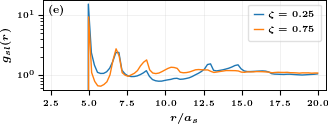

In [175]:
## Gr plot

vrr = ['0.25', '0.75']
phi = [0.79, 0.78]
ar              = 4.0
sizePair        = 'sl'

# Create figure with length twice the height
fig, ax = plt.subplots(figsize=(fig_width/2, fig_height/1.5))  # Width=8, Height=4 → width is twice height

for i, vri in enumerate(vrr):
    phii = phi[i]
    phir = '{:.3f}'.format(phii) if len(str(phii).split('.')[1]) > 2 else '{:.2f}'.format(phii)
    dataname = f'{topDir}/NP_{npp}/phi_{phir}/ar_{ar:.1f}/Vr_{vri}/run_{numRun}'

    if os.path.exists(dataname):
        datFile = glob.glob(f'{dataname}/PDF_{sizePair}_*.txt')[0]
        rbin = np.genfromtxt(datFile, skip_header=1, max_rows=1)
        g_r_theta = np.genfromtxt(datFile, skip_header=5)

        rlim = 20
        indx = (np.abs(rbin - rlim)).argmin() + 1
        gr = np.mean(g_r_theta, axis=1)

        ax.plot(rbin[:indx], gr[:indx], linestyle='-', label=fr'$\zeta = {float(vri):.2f}$')#,
                #linewidth=1.5)

# Legend with updated fontsize and label spacing
ax.legend(labelspacing=0.8, frameon=True, fontsize=6.5, borderpad=0.7)

ax.set_xlabel(r'$r / a_s$', fontweight='bold', fontsize=8)
ax.set_ylabel(r'$g_{sl}(r)$', fontweight='bold', fontsize=8)
ax.grid(False)
ax.set_yscale('log')

ax.text(0.02, 0.95, r'$\mathbf{(e)}$', weight='bold', color='black',
        transform=ax.transAxes, ha='left', va='top', fontsize=8)

ax.tick_params(axis='both', which='major', labelsize=6)
#plt.tight_layout()
plt.xlim(2,rlim+0.5)
plt.tight_layout()
plt.grid('True', alpha=0.3)
for spine in ax.spines.values():
    spine.set_linewidth(0.7)
    
if True:
    figFormat=".pdf"
    fig.savefig(f'{fig_save_path}/gr{figFormat}', bbox_inches="tight",dpi=800)
plt.show()

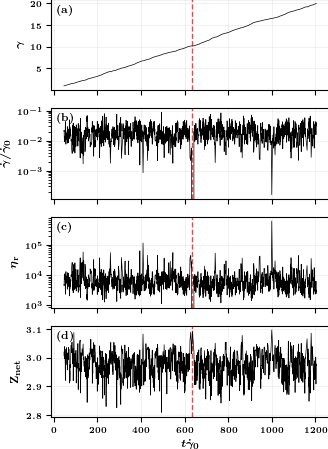

In [188]:
# import os
# import glob
# import numpy as np
# import matplotlib.pyplot as plt

# Parameters
npp    = 1000
vrr    = '0.25'
phi    = 0.77
ar     = 1.4
numRun = 1
off    = 100

# Create figure with shared x-axis
fig, ax = plt.subplots(4, 1, figsize=(fig_width/2, 9/1.9), sharex=True)

# File path
dataname = f'{topDir}/NP_{npp}/phi_{phi}/ar_{ar:.1f}/Vr_{vrr}/run_{numRun}/'

if os.path.exists(dataname): 
    dataFile = glob.glob(dataname + "data_*.dat")[0]
    data     = np.loadtxt(dataFile)

    znetFile = dataname+"Z_Znet.txt"
    znet     = np.loadtxt(znetFile)[off:, 2]

    shearstress = data[off:, -2]
    cumStrain   = data[off:, 1]
    shearrate   = data[off:, 2]
    viscosity   = data[off:, 3]
    time        = data[off:, 0]

    y_data   = [cumStrain, shearrate, viscosity, znet]
    y_labels = [r'$\mathbf{\gamma}$', r'$\mathbf{\dot{\gamma}/\dot{\gamma}_0}$',
                r'$\mathbf{\eta_r}$', r'$\mathbf{Z_{\mathrm{net}}}$']

    for i, (y, ylabel) in enumerate(zip(y_data, y_labels)):
        ax[i].plot(time, y, linestyle='-', color='k', linewidth=0.5, zorder=10)
        ax[i].set_ylabel(ylabel)#, fontsize=17)
        ax[i].grid('True', alpha =0.3)
    
        indexes = np.where(shearrate < 0)[0]
        for idx in indexes:
            ax[i].axvline(x=time[idx], color='red', linestyle='--', alpha=0.75, linewidth=1)

else:
    print(f'{dataname} - Path DNE')

ax[-1].set_xlabel(r'$t\dot{\gamma}_{0}$')#, fontsize=17)
#ax[0].set_yscale('log')
ax[1].set_yscale('log')
ax[2].set_yscale('log')

for a in ax[:-1]:
    a.tick_params(labelbottom=False)
for a in ax:
    a.tick_params(axis='both', which='both')#, labelsize=14)

labels = [r'$\mathbf{(a)}$', r'$\mathbf{(b)}$', r'$\mathbf{(c)}$', r'$\mathbf{(d)}$']
for i, a in enumerate(ax):
    a.tick_params(axis='both', which='both')#, labelsize=14)  # increase tick font size
    a.text(0.02, 0.95, labels[i],
           transform=a.transAxes,
           #fontsize=14,
           va='top', ha='left')
    
#fig.suptitle(fr'$\phi = {phi:.3f}, \; \mathrm{{Monodisperse}}$', fontsize=16, x=0.55, y=0.985)
#fig.suptitle(fr'$\phi = {phi:.2f}, \delta = {ar:.1f}, \zeta = {vrr}$', x=0.55, y=0.955)#, fontsize=16) 

plt.tight_layout()

if True:
    figFormat=".pdf"
    fig.savefig(f'{fig_save_path}/time_Series_phi_{phi:.3f}_delta_{ar:.1f}_zeta_{vrr}{figFormat}', bbox_inches="tight",dpi=800)
plt.show()

In [6]:
## Actual Fig 3
# works on linux

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import warnings
warnings.filterwarnings("ignore", message=".*not compatible with tight_layout.*")


# --- Parameters ---
npp      = 1000
vr       = '0.5'
phi_vals = [0.765, 0.765, 0.77, 0.795]
ar_vals  = [1.0, 1.4, 2.0, 4.0]
off      = 100
numRun   = 1

line_markers  = ['o', '*', 'p', 's']
colors        = ['#4a91b5', '#e68139', '#5da258', '#87629b']
stress        = ['0.05','0.1','0.2','0.5','1','2','5','10','25','50','80','100','200','250']
stress_floats = [float(s) for s in stress]

# --- Setup figure ---
#fig, axs = plt.subplots(1, 2, figsize=(fig_width, 2.8))
fig, axs = plt.subplots(1, 2, figsize=(fig_width, 2.8), constrained_layout=True)

ax_main, ax_n1 = axs
ax_inset = inset_axes(ax_main, width="30%", height="30%", loc='upper left', 
                      bbox_to_anchor=(0.12, -.23, 1.2, 1.2), bbox_transform=ax_main.transAxes)

# --- Loop over aspect ratios ---
for j, (arj, phij) in enumerate(zip(ar_vals, phi_vals)):
    visc, visc_std, sr, sr_std = [np.nan]*len(stress), [np.nan]*len(stress), [np.nan]*len(stress), [np.nan]*len(stress)

    for i, s in enumerate(stress):    
        path = f'{topDir}/flow_curves/stress_{s}r/NP_{npp}/phi_{phij}/ar_{arj}/Vr_{vr}/run_{numRun}'
        try:
            file = glob.glob(f'{path}/data_*.dat')[0]
            data = np.loadtxt(file)
            if data.ndim > 1:
                visc[i]     = np.mean(data[off:, 3])
                visc_std[i] = np.std(data[off:, 3])
                sr[i]       = np.mean(data[off:, 2])
                sr_std[i]   = np.std(data[off:, 2])
        except (IndexError, FileNotFoundError):
            continue

    # Filter NaNs
    mask = ~np.isnan(visc)
    stress_plot = np.array(stress_floats)[mask]
    visc_plot = np.array(visc)[mask]
    sr_plot = np.array(sr)[mask]

    # Plot viscosity vs stress (main plot)
    ax_main.plot(stress_plot, visc_plot, '--', marker=line_markers[j],
                 color=colors[j], label=rf'$\delta = {arj:.1f}, \; \phi = {phij}$')#, linewidth=2, markersize=6.5)

    # Plot viscosity vs shear rate (inset)
    ax_inset.plot(sr_plot, visc_plot, '-', marker=line_markers[j],
                  color=colors[j], markersize=2, linewidth=1.2)

# --- Format ax_main ---
labelsize = 10.5
ticksize  = 7
ax_main.set(xscale='log', yscale='log')
ax_main.set_xlabel(r'$\mathbf{\sigma/\sigma_{0}}$', style='italic', fontweight='bold', fontsize=labelsize)
ax_main.set_ylabel(r'$\mathbf{\eta_r}$', style='italic',fontsize=labelsize, fontweight='bold')
ax_main.set_xticks([0.1, 1, 10, 100])
ax_main.set_xticklabels([r'$10^{-1}$', r'$10^{0}$', r'$10^{1}$', r'$10^{2}$'], fontsize=ticksize, fontweight='bold')
ax_main.set_yticks([100, 1000, 10000])
ax_main.set_yticklabels([r'$10^{2}$', r'$10^{3}$', r'$10^{4}$'], fontsize=ticksize, fontweight='bold')

# --- Format inset ---
ax_inset.set(xscale='log', yscale='log')
ax_inset.set_xlabel(r'$\mathbf{\dot \gamma/ \dot \gamma_{0}}$', fontsize=6, fontweight='bold', style='italic')
ax_inset.set_ylabel(r'$\mathbf{\eta_r}$', fontsize=6, fontweight='bold', style='italic')
ax_inset.tick_params(labelsize=4.6)#, length=1, width=0.6)
for axis in [ax_inset.xaxis, ax_inset.yaxis]:
    for line in axis.get_ticklines():
        line.set_markersize(line.get_markersize() * 0.7)   # scale length
        line.set_linewidth(line.get_linewidth() * 0.3)     # scale width

# --- Second subplot (N1 vs stress) ---
for j, (arj, phij) in enumerate(zip(ar_vals, phi_vals)):
    n1, n1_std = [np.nan]*len(stress), [np.nan]*len(stress)
    
    for i, s in enumerate(stress):
        if arj == 4 and s == '100':
            path = f'{topDir}/flow_curves/stress_{s}r/NP_{npp}/phi_{phij}/ar_{arj}/Vr_{vr}/run_2'
        else:
            path = f'{topDir}/flow_curves/stress_{s}r/NP_{npp}/phi_{phij}/ar_{arj}/Vr_{vr}/run_{numRun}'
        #path = f'{topDir}stress_{s}r/NP_{npp}/phi_{phij}/ar_{arj}/Vr_{vr}/run_{numRun}'
        
        try:
            file = glob.glob(f'{path}/data_*.dat')[0]
            data = np.loadtxt(file)
            if data.ndim > 1:
                n1[i] = np.mean(data[off:, 10])
                n1_std[i] = np.std(data[off:, 10])
        except (IndexError, FileNotFoundError):
            continue

    mask = ~np.isnan(n1)
    stress_plot = np.array(stress_floats)[mask]
    n1_plot = np.array(n1)[mask]

    ax_n1.plot(stress_plot, n1_plot, '--', marker=line_markers[j],
               color=colors[j], label=rf'$\delta = {arj:.1f}, \; \phi = {phij:.3f}$')#, linewidth=2, markersize=6)
    
    if arj == 1:
        print(n1_plot)

# --- Format ax_n1 ---
ax_n1.set(xscale='log')
ax_n1.set_ylim([-150, 500])
ax_n1.set_xlabel(r'$\mathbf{\sigma/\sigma_{0}}$', fontsize=labelsize, fontweight='bold', style='italic')
ax_n1.set_ylabel(r'$\textbf{N}_{1}/\eta_0$', fontsize=labelsize)#, fontweight='bold', style='italic')
ax_n1.set_xticks([0.1, 1, 10, 100])
ax_n1.set_xticklabels([r'$10^{-1}$', r'$10^{0}$', r'$10^{1}$', r'$10^{2}$'], fontsize=ticksize, fontweight='bold')
ax_n1.tick_params(axis='y', labelsize=ticksize, width=1)

# --- Add legends ---
#ax_main.legend(loc='lower right', fontsize=14, labelspacing=1.5, borderpad=1.2, framealpha=0.5)
ax_n1.legend(loc='upper left', fontsize=7, labelspacing=1.1, borderpad=0.5, framealpha=0.5)

# --- Save and show ---
#plt.tight_layout()
if False:
    plt.savefig(f'{fig_save_path}/flowcurve_n1.pdf', bbox_inches="tight", dpi=600)
    
plt.show()

[ 49.09679504   6.80806073  15.5214153   20.7961538   38.31646245
  87.51973207  61.76287731  37.43091855  86.63286109 157.74481666
 300.31030909 443.91787324]


AttributeError: 'NoneType' object has no attribute '_get_renderer'

<Figure size 705.826x280 with 3 Axes>

[ 49.09679504   6.80806073  15.5214153   20.7961538   38.31646245
  87.51973207  61.76287731  37.43091855  86.63286109 157.74481666
 300.31030909 443.91787324]


/var/folders/7z/4v7gv78n0rq_k11539h6b9zc0000gn/T/ipykernel_9090/3955533689.py:116: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


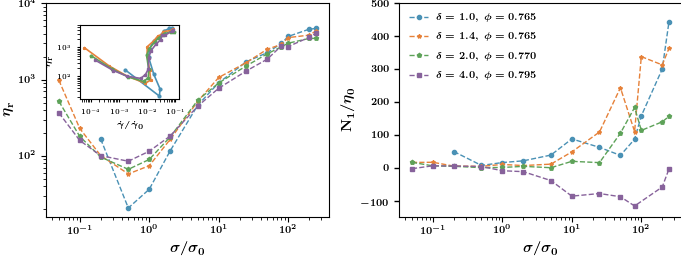

In [7]:
## Actual Fig 3 (clean version)
# Works on MAC

# --- Parameters ---
npp      = 1000
vr       = '0.5'
phi_vals = [0.765, 0.765, 0.77, 0.795]
ar_vals  = [1.0, 1.4, 2.0, 4.0]
off      = 100
numRun   = 1

line_markers  = ['o', '*', 'p', 's']
colors        = ['#4a91b5', '#e68139', '#5da258', '#87629b']
stress        = ['0.05','0.1','0.2','0.5','1','2','5','10','25','50','80','100','200','250']
stress_floats = [float(s) for s in stress]

# --- Setup figure ---
fig, axs = plt.subplots(1, 2, figsize=(fig_width, 2.8), constrained_layout=True)
ax_main, ax_n1 = axs

# inset_axes replacement (relative coords: [x0, y0, width, height])
ax_inset = ax_main.inset_axes([0.12, 0.55, 0.35, 0.35])  

# --- Loop over aspect ratios ---
for j, (arj, phij) in enumerate(zip(ar_vals, phi_vals)):
    visc, visc_std, sr, sr_std = [np.nan]*len(stress), [np.nan]*len(stress), [np.nan]*len(stress), [np.nan]*len(stress)

    for i, s in enumerate(stress):    
        path = f'{topDir}/flow_curves/stress_{s}r/NP_{npp}/phi_{phij}/ar_{arj}/Vr_{vr}/run_{numRun}'
        try:
            file = glob.glob(f'{path}/data_*.dat')[0]
            data = np.loadtxt(file)
            if data.ndim > 1:
                visc[i]     = np.mean(data[off:, 3])
                visc_std[i] = np.std(data[off:, 3])
                sr[i]       = np.mean(data[off:, 2])
                sr_std[i]   = np.std(data[off:, 2])
        except (IndexError, FileNotFoundError):
            continue

    # Filter NaNs
    mask = ~np.isnan(visc)
    stress_plot = np.array(stress_floats)[mask]
    visc_plot   = np.array(visc)[mask]
    sr_plot     = np.array(sr)[mask]

    # Plot viscosity vs stress (main plot)
    ax_main.plot(stress_plot, visc_plot, '--', marker=line_markers[j],
                 color=colors[j], label=rf'$\delta = {arj:.1f}, \; \phi = {phij}$')

    # Plot viscosity vs shear rate (inset)
    ax_inset.plot(sr_plot, visc_plot, '-', marker=line_markers[j],
                  color=colors[j], markersize=2, linewidth=1.2)

# --- Format ax_main ---
labelsize = 10.5
ticksize  = 7
ax_main.set(xscale='log', yscale='log')
ax_main.set_xlabel(r'$\mathbf{\sigma/\sigma_{0}}$', style='italic', fontweight='bold', fontsize=labelsize)
ax_main.set_ylabel(r'$\mathbf{\eta_r}$', style='italic', fontsize=labelsize, fontweight='bold')
ax_main.set_xticks([0.1, 1, 10, 100])
ax_main.set_xticklabels([r'$10^{-1}$', r'$10^{0}$', r'$10^{1}$', r'$10^{2}$'], fontsize=ticksize, fontweight='bold')
ax_main.set_yticks([100, 1000, 10000])
ax_main.set_yticklabels([r'$10^{2}$', r'$10^{3}$', r'$10^{4}$'], fontsize=ticksize, fontweight='bold')

# --- Format inset ---
ax_inset.set(xscale='log', yscale='log')
ax_inset.set_xlabel(r'$\mathbf{\dot \gamma/ \dot \gamma_{0}}$', fontsize=6, fontweight='bold', style='italic')
ax_inset.set_ylabel(r'$\mathbf{\eta_r}$', fontsize=6, fontweight='bold', style='italic')
ax_inset.tick_params(labelsize=4.6)
for axis in [ax_inset.xaxis, ax_inset.yaxis]:
    for line in axis.get_ticklines():
        line.set_markersize(line.get_markersize() * 0.7)   # scale length
        line.set_linewidth(line.get_linewidth() * 0.3)     # scale width

# --- Second subplot (N1 vs stress) ---
for j, (arj, phij) in enumerate(zip(ar_vals, phi_vals)):
    n1, n1_std = [np.nan]*len(stress), [np.nan]*len(stress)
    
    for i, s in enumerate(stress):
        if arj == 4 and s == '100':
            path = f'{topDir}/flow_curves/stress_{s}r/NP_{npp}/phi_{phij}/ar_{arj}/Vr_{vr}/run_2'
        else:
            path = f'{topDir}/flow_curves/stress_{s}r/NP_{npp}/phi_{phij}/ar_{arj}/Vr_{vr}/run_{numRun}'
        try:
            file = glob.glob(f'{path}/data_*.dat')[0]
            data = np.loadtxt(file)
            if data.ndim > 1:
                n1[i]     = np.mean(data[off:, 10])
                n1_std[i] = np.std(data[off:, 10])
        except (IndexError, FileNotFoundError):
            continue

    mask = ~np.isnan(n1)
    stress_plot = np.array(stress_floats)[mask]
    n1_plot     = np.array(n1)[mask]

    ax_n1.plot(stress_plot, n1_plot, '--', marker=line_markers[j],
               color=colors[j], label=rf'$\delta = {arj:.1f}, \; \phi = {phij:.3f}$')
    
    if arj == 1:
        print(n1_plot)

# --- Format ax_n1 ---
ax_n1.set(xscale='log')
ax_n1.set_ylim([-150, 500])
ax_n1.set_xlabel(r'$\mathbf{\sigma/\sigma_{0}}$', fontsize=labelsize, fontweight='bold', style='italic')
ax_n1.set_ylabel(r'$\textbf{N}_{1}/\eta_0$', fontsize=labelsize)
ax_n1.set_xticks([0.1, 1, 10, 100])
ax_n1.set_xticklabels([r'$10^{-1}$', r'$10^{0}$', r'$10^{1}$', r'$10^{2}$'], fontsize=ticksize, fontweight='bold')
ax_n1.tick_params(axis='y', labelsize=ticksize, width=1)

# --- Add legends ---
ax_n1.legend(loc='upper left', fontsize=7, labelspacing=1.1, borderpad=0.5, framealpha=0.5)

# --- Save and show ---
plt.tight_layout()
# plt.savefig(f'{fig_save_path}/flowcurve_n1.pdf', bbox_inches="tight", dpi=600)
plt.show()

In [211]:
## Reading pickle

import pickle
fig_save_path = '/home/rahul/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/figures/paper_figs/'
save_path     = f'{fig_save_path}/anisotropy_force_weighted.pkl'

# Load the pickle
with open(save_path, 'rb') as f:
    loaded_data = pickle.load(f)

# Access the lists
phim_mu_1   = loaded_data['phim_mu_1']
phi_mu_1    = loaded_data['phi_mu_1']
a_mu_1      = loaded_data['a_mu_1']
phim_mu_inf = loaded_data['phim_mu_inf']
phi_mu_inf  = loaded_data['phi_mu_inf']
a_mu_inf    = loaded_data['a_mu_inf']
eigvec_all  = loaded_data['eigvec_all']

# Example: print the first element of phi_mu_1
print(phi_mu_1[0])

[0.71, 0.73, 0.75, 0.77, 0.78]


/tmp/ipykernel_1259746/1363697890.py:102: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.savefig(f'{fig_save_path}/anisotropy_force_phi2.pdf', dpi=800, bbox_inches='tight')


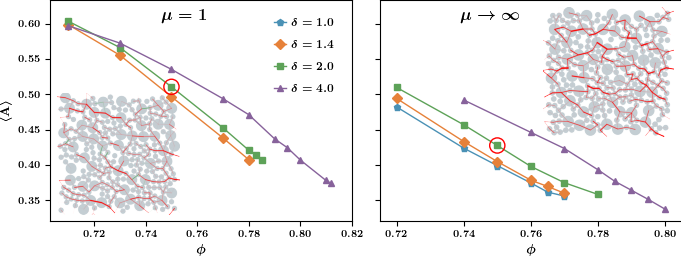

In [280]:
## seperate plots (force weighted)
# Not phim
# with circles

from matplotlib.patches import Circle
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.image as mpimg

# save fig
figSave = False

#ss = 100 # markersize
# params
vrr          = '0.5'
colors       = ['#4a91b5', '#e68139', '#5da258', '#87629b', '#1b9e77']
marker_shape = ['p', 'D', 's', '^', 'o']

png_input = '/home/rahul/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/figures/paper_figs/interactions/'

# Compute y-axis limits across all datasets
all_data = np.concatenate([np.concatenate(a_mu_1), np.concatenate(a_mu_inf)])
ymin, ymax = all_data.min()*0.95, all_data.max()*1.05

all_phi = np.concatenate([np.concatenate(phi_mu_1), np.concatenate(phi_mu_inf)])
xmin, xmax = all_phi.min()*0.99, all_phi.max()*1.01

# ============ combined plot: mu = 1 and mu = ∞ ============
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(fig_width, 2.8), sharey=True)

# ---------------- mu = 1 plot ----------------
arr = [1.4, 2.0, 4.0]
for i in range(len(a_mu_1)):
    ax1.plot(phi_mu_1[i], a_mu_1[i], color=colors[i+1],
             label=fr'$\delta = {arr[i]}$',
             marker=marker_shape[i+1], markersize=5)

# highlight arr == 2.0 case (index 1)
ax1.scatter(phi_mu_1[-2][2], a_mu_1[-2][2],
            s=120, facecolors='none', edgecolors='red', zorder=10)



# set axis labels with font size
ax1.set_xlabel(r'$\phi$', fontsize=9)
ax1.set_ylabel(r'$\langle \mathbf{A} \rangle$', fontsize=9)

# set tick label size
ax1.tick_params(axis='both', which='major', labelsize=7)  # major ticks
ax1.tick_params(axis='both', which='minor', labelsize=7)   # minor ticks if you have them

ax1.set_xlim(xmin, xmax)
ax1.set_ylim(ymin, ymax)
# ax1.legend(frameon=False, borderpad=1.1, labelspacing=1.1, loc='upper right')

# ---------------- mu = ∞ plot ----------------
arr = [1.0, 1.4, 2.0, 4.0]
for i in range(len(a_mu_inf)):
    ax2.plot(phi_mu_inf[i], a_mu_inf[i], color=colors[i],
             label=fr'$\delta = {arr[i]}$', #linewidth=1.2,
             marker=marker_shape[i], markersize=5)

# highlight arr == 2.0 case (index 2)
ax2.scatter(phi_mu_inf[-2][2], a_mu_inf[-2][2],
            s=120, facecolors='none', edgecolors='red', #linewidths=1.2,
            zorder=10)

# inset 2
axins = inset_axes(ax2, width="60%", height="60%", bbox_to_anchor=(0.08, 0.0, 0.98, 0.98),  # x0, y0, width, height
                   bbox_transform=ax2.transAxes,
                   borderpad=0.3)
img   = mpimg.imread(f"{png_input}/mu=inf/phi_0.75_ar_2.0_vr_0.5_int_cropped/226.png")
axins.imshow(img)
axins.axis("off")

# inset 1
axins = inset_axes(ax1, width="60%", height="60%", bbox_to_anchor=(-0.41, -0.33, 0.92, 0.92),  # x0, y0, width, height
                   bbox_transform=ax1.transAxes,
                   borderpad=0.3)
img   = mpimg.imread(f"{png_input}/mu=1/phi_0.75_ar_2.0_vr_0.5_int_cropped/201.png")
axins.imshow(img)
axins.axis("off")

ax2.set_xlabel(r'$\phi$', fontsize=9)
ax2.tick_params(axis='x', which='major', labelsize=7)  # major ticks
ax2.tick_params(axis='x', which='minor', labelsize=7)  # minor tic
ax2.set_xlim(0.715, 0.805)
ax2.set_ylim(ymin, ymax)

#ax2 legend in ax1
handles, labels = ax2.get_legend_handles_labels()
ax1.legend(handles, labels, frameon=False, fontsize=8,
           borderpad=1.1, labelspacing=1.1, loc='upper right')

ax1.text(0.755, 0.61, r"$\mu = 1$", fontsize=12, color='black',
         ha='center', va='center')
ax2.text(0.748, 0.61, r"$\mu \to \infty$", fontsize=12, color='black',
         ha='center', va='center')

# ---------------- save figure ----------------
#fig.tight_layout()
if True:
    fig.savefig(f'{fig_save_path}/anisotropy_force_phi2.pdf', dpi=800, bbox_inches='tight')